# Funciones de correlación
Comenzamos importando las siguientes paqueterias

In [79]:
import math
import random
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.animation as animation

## Construcción de las circunferencias
Como queremos graficar puntos aleatorios de un círculo, primero debemos recordar como se grafica una circunferencia:

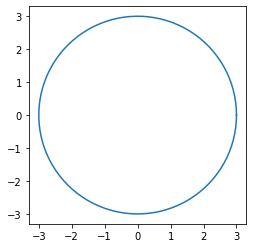

In [2]:
theta = np.linspace(0, 2*np.pi, 100) #angulo
r = 3 #radio
x = r*np.cos(theta)
y = r*np.sin(theta)
#Graficamos
figure, axes = plt.subplots(1)
axes.plot(x, y)
axes.set_aspect(1)
plt.show()

Ahora, sólo queremos  elegir algunos puntos aleatorios de la circunferencia, y lo hacemos de la siguiente forma:

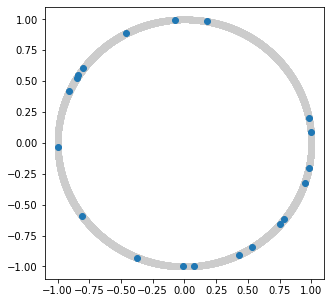

In [3]:
randProba = lambda a: a/sum(a)
npoints = 5000 # puntos en los que se dividirá cada círculo
r = 1 # radio del círculo

#Graficamos circunferencia gris
plt.figure(figsize=(5,5))
t = np.linspace(0, 2*np.pi, npoints, endpoint=False)
x = r * np.cos(t)
y = r * np.sin(t)
plt.scatter(x, y, c='0.8')

#Graficamos puntos aleatorios de la circunferencia
n = 20 # puntos aleatorios que elegiremos del círculo
t = np.linspace(0, 2*np.pi, npoints, endpoint=False)[np.random.choice(range(npoints), n, replace=False, p=randProba(np.random.random(npoints)))]
x = r * np.cos(t)
y = r * np.sin(t)
plt.scatter(x, y)

### Le agregamos perturbaciones 

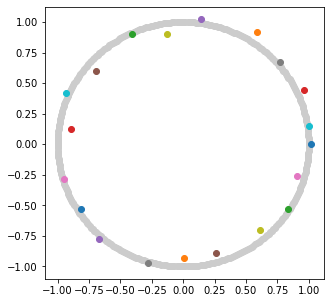

In [4]:
randProba = lambda a: a/sum(a)
npoints = 360 # puntos en los que se dividirá cada círculo
r = 1 # radio del círculo

plt.figure(figsize=(5,5))
t = np.linspace(0, 2*np.pi, npoints, endpoint=False) 
x = (r * np.cos(t))
y = r * np.sin(t)
plt.scatter(x, y, c='0.8')

n = 20 # number of points to chose
puntos = np.linspace(0, 2*np.pi, npoints, endpoint=False)[np.random.choice(range(npoints), n, replace=False)]
for t in range(len(puntos)):
    R = r + random.uniform(-r*0.1,r*0.1)
    x = R * np.cos(t)
    y = R * np.sin(t)
    plt.scatter(x, y)

## Puntos en diferentes círculos aleatorios
A continuación programamos una función a la cual le entregamos los siguientes datos: cantidad de circulos, puntos en los que dividiremos cada círculo, canidad de esos puntos que eligiremos de cada círculo, radio de los círculos, y rango de los centros. A partir de estos datos, nos entrega una 2 listas que son las coordenadas x, y las coordenadas y de cada punto que sigue la distribución de pertenecer a algún circulo con una perturbación del 10% del radio.

In [13]:
def Puntos_circulos(num, npoints,n,R,a_if,b_if):
    #donde num es numero de circulos
    #      npoints son los puntos en los que se dividirá cada círculo
    #      n son la cantidad de puntos que elegiremos de cada circulo
    #      R es el radio de los círculos
    #      a_if=[0,100] Rango de centros en x
    #      b_if=[0,100] Rango de centros en y
    randProba = lambda a: a/sum(a)
    #Comenzamos a graficar
    plt.figure(figsize=(8,8)) 
    #Definimos dos arreglos de ceros en los que guardaremos en uno las coordenadas x y en otro las y de los puntos que aleatorios de nuestros círculos
    x_1=[]
    y_1=[]
    # Para cada cículo
    for i in range(num):
        #centro : para las coordenadas del centro previamente alegimos entre que puntos puede estar
        a = random.uniform(a_if[0],a_if[1])
        b = random.uniform(b_if[0],b_if[1])
        #Guardamos los centros en nuestros arreglos X_1 y y_1
        x_1.extend([a])
        y_1.extend([b])
        # graficamos los centros
        plt.scatter(a,b, color='b', lw=0.1)
        #circunferencia
        puntos = np.linspace(0, 2*np.pi, npoints, endpoint=False)[np.random.choice(range(npoints), n, replace=False, p=randProba(np.random.random(npoints)))]
        for t in range(len(puntos)): 
            r = R + random.uniform(-R*0.1,R*0.1) #Pertubación 10% del radio
            x1 = a + r * np.cos(t)
            y1 = b + r * np.sin(t)
            #Como los centros de los círculos pueden estar en la orilla, 
            #muchos puntos del cículo deseado se pueden salir de área a estudiar deseada, 
            #por lo que sólo guardamos los que quedan dentro
            if (a_if[0]< x1 <a_if[1]) & (b_if[0] < y1 <b_if[1]):
                x_1.extend([x1])
                y_1.extend([y1])
                #Graficamos los puntos
                plt.scatter(x1, y1, color='b', lw=0.1)
        plt.xlim(a_if[0]-(R/2),a_if[1]+(R/2))
        plt.ylim(b_if[0]-(R/2),b_if[1]+(R/2))
    return x_1, y_1

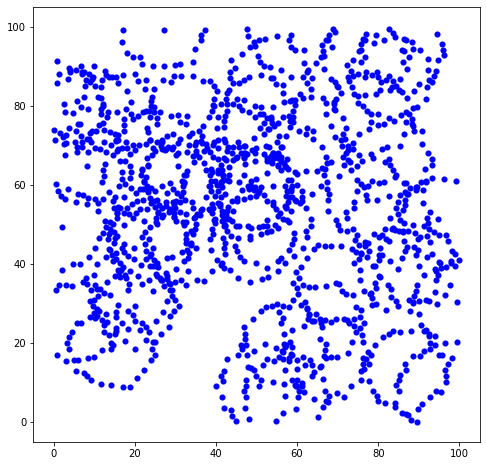

In [16]:
x_1,y_1 = Puntos_circulos(50,100,30,10,[0,100],[0,100])

Para los siguientes calculos usamos la siguiente función para calcular distancias entre dos puntos:
$$d(\bar{x},\bar{y})=\sqrt{(x_1-x_2)^2+(y_1-y_2)^2}$$

In [17]:
#Creamos una función que nos de las distancias entre dos puntos
def getLen(x1,y1,x2,y2):
    diff_x = (x1-x2)**2
    diff_y = (y1-y2)**2
    length = math.sqrt(diff_x+diff_y)
    return length

A continuación programamos una función que calcula las distancias entre todos los puntos, sin repetir.

In [18]:
def distancias(x_1,y_1):
    distancias_lista = []
    for i in range(len(x_1)):
        for j in range(i,len(y_1)):
            if j != i:  #Checamos que no estemos repitiendo un punto
                d = getLen(x_1[i],y_1[i],x_1[j],y_1[j]) #Aplicamos la función para calcular su distancia
                distancias_lista.append(d)
    return distancias_lista

In [19]:
distancias_bayes = distancias(x_1,y_1)

Para comprobar que no estamos midiendo la distancia entre el punto con el mismo, vemos que la longitud de la lista de distancias_bayes es igual a la longitud de la lista de no ceros de distancias_bayes

In [20]:
len(distancias_bayes)

968136

In [21]:
np.count_nonzero(distancias_bayes)

968136

A continuación, graficamos el histograma de estas distancias

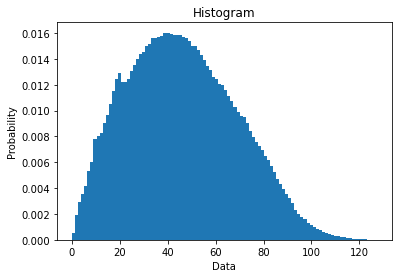

In [22]:
import scipy.stats as st

hist_circ = plt.hist(distancias_bayes, density=True, bins=100, label="Data")
plt.ylabel("Probability")
plt.xlabel("Data")
plt.title("Histogram");

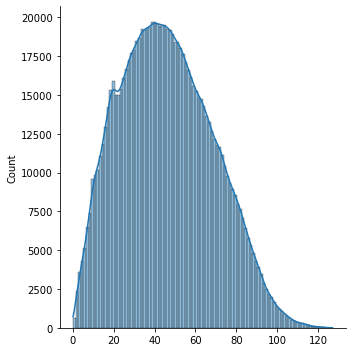

In [23]:
sns.displot(distancias_bayes, bins=100, kde=True);

También lo graficamos a escala logaritmica

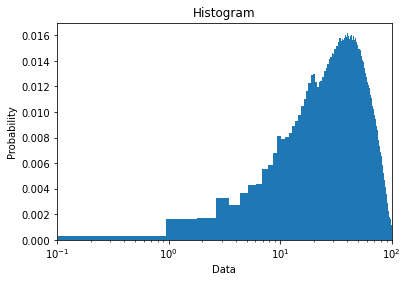

In [24]:
import scipy.stats as st

plt.hist(distancias_bayes, density=True, bins=150, label="Data")
plt.ylabel("Probability")
plt.xlabel("Data")
plt.xscale('log')
plt.xlim(.1,100)
plt.title("Histogram");

### Distribución aaleatoria
Para este tipo de distribución utilizaremos la función **random.Uniform()**
<img src=https://numpy.org/doc/stable/_images/numpy-random-uniform-1.png>

In [25]:
def puntos_aleatorios(c_if,d_if,x_1):
    # donde: c_if=[0,100] Rango de centros en x
    #        d_if=[0,100] Rango de centros en y
    #        x_1 es la lista de x's de la distribución de circunferencias con la que lo queremos comparar
    X2 = []
    Y2 = []
    for i in range(len(x_1)):
        x = np.random.uniform(c_if[0],c_if[1])
        y = np.random.uniform(d_if[0],d_if[1])
        X2.extend([x])
        Y2.extend([y])
        plt.scatter(X2, Y2, color='b', lw=0.1)
    return X2, Y2

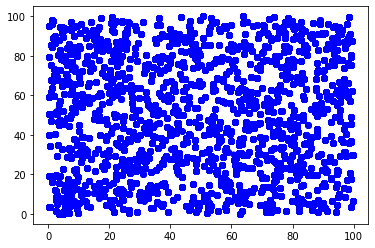

In [26]:
X2,Y2 = puntos_aleatorios([0,100],[0,100],x_1)

Para commprobar que la distribución de circunferencias y la aleatoria uniforme tienen la misma cantidad de puntos checamos sus distancias

In [27]:
len(y_1)

1392

In [28]:
len(Y2)

1392

Calculamos las distancias de los puntos con distribución uniforme

In [29]:
distancias_random_uniform = distancias(X2,Y2)

Graficamos el histograma de sus distancias

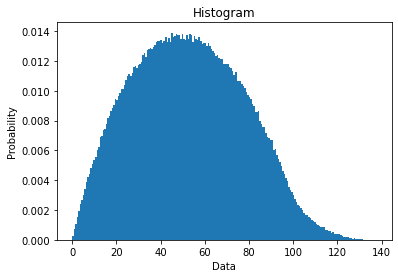

In [30]:
hist_random = plt.hist(distancias_random_uniform, density=True, bins=200, label="Data")
plt.ylabel("Probability")
plt.xlabel("Data")
plt.title("Histogram");

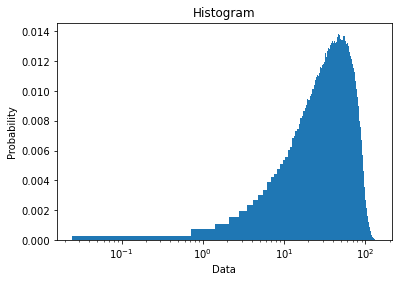

In [31]:
plt.hist(distancias_random_uniform, density=True, bins=200, label="Data")
plt.ylabel("Probability")
plt.xlabel("Data")
plt.xscale('log')
plt.title("Histogram");

# Comparamos los puntos

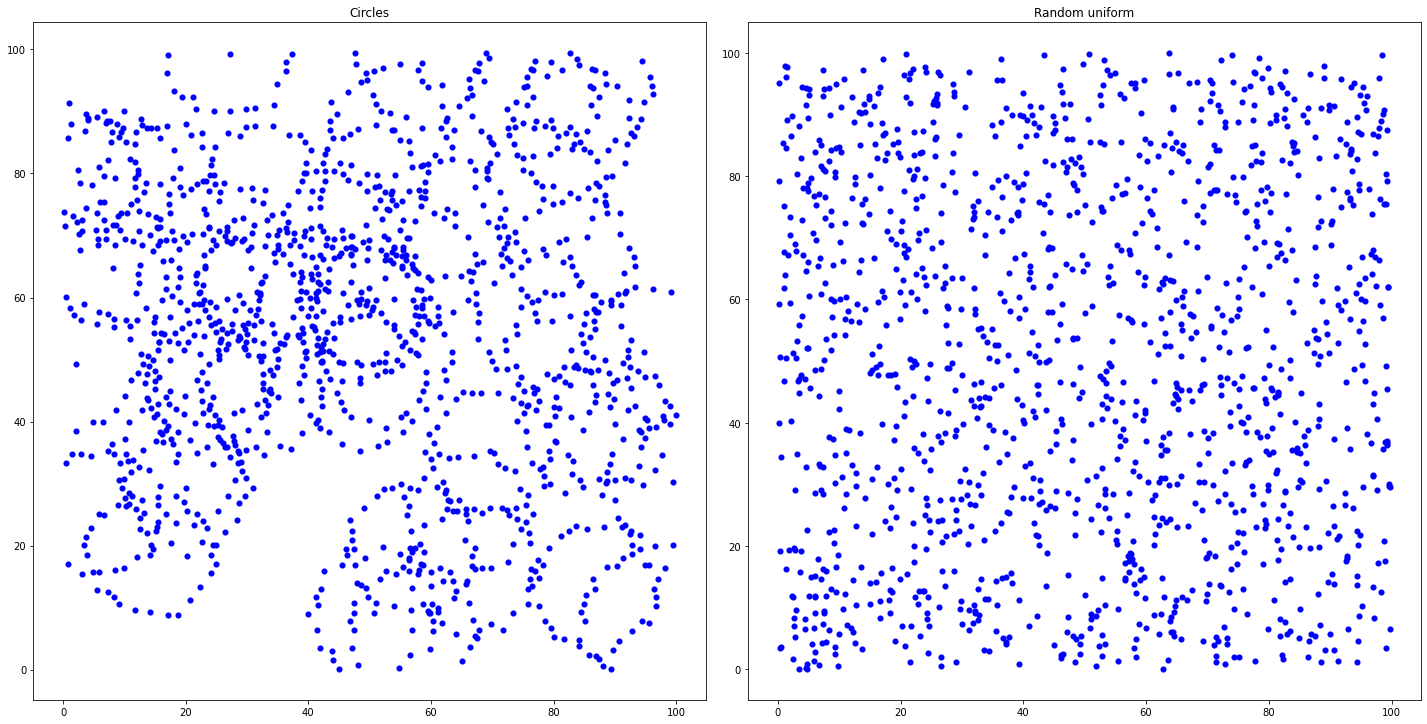

In [32]:
fig_cosmo, axes_cosmo = plt.subplots(figsize=(20,10), nrows=1, ncols=2)
plt.tight_layout()
axes_cosmo[0].set_title('Circles')
axes_cosmo[0].scatter(x_1, y_1, color='b', lw=0.1)

axes_cosmo[1].set_title('Random uniform')
axes_cosmo[1].scatter(X2, Y2, color='b', lw=0.1)

(array([4.91300854e-04, 1.30063463e-03, 2.16547415e-03, 2.84204418e-03,
        3.62512523e-03, 4.30244534e-03, 4.95501289e-03, 5.48081731e-03,
        6.15588719e-03, 6.92471677e-03, 7.40776677e-03, 7.97482546e-03,
        8.49162896e-03, 8.97017849e-03, 9.42547562e-03, 9.75250947e-03,
        1.01320488e-02, 1.05865958e-02, 1.10358923e-02, 1.11056495e-02,
        1.16539563e-02, 1.16562065e-02, 1.18662283e-02, 1.24542891e-02,
        1.24895428e-02, 1.28405791e-02, 1.28765828e-02, 1.31698632e-02,
        1.33348803e-02, 1.33266294e-02, 1.35066481e-02, 1.34128884e-02,
        1.36064084e-02, 1.36521631e-02, 1.37939278e-02, 1.36131591e-02,
        1.36484127e-02, 1.35959073e-02, 1.36536633e-02, 1.34946468e-02,
        1.36064084e-02, 1.34901463e-02, 1.32553720e-02, 1.32118675e-02,
        1.31136074e-02, 1.29380892e-02, 1.26065549e-02, 1.23770311e-02,
        1.21970125e-02, 1.19629883e-02, 1.17889703e-02, 1.17079619e-02,
        1.14484350e-02, 1.11634055e-02, 1.06601034e-02, 1.058809

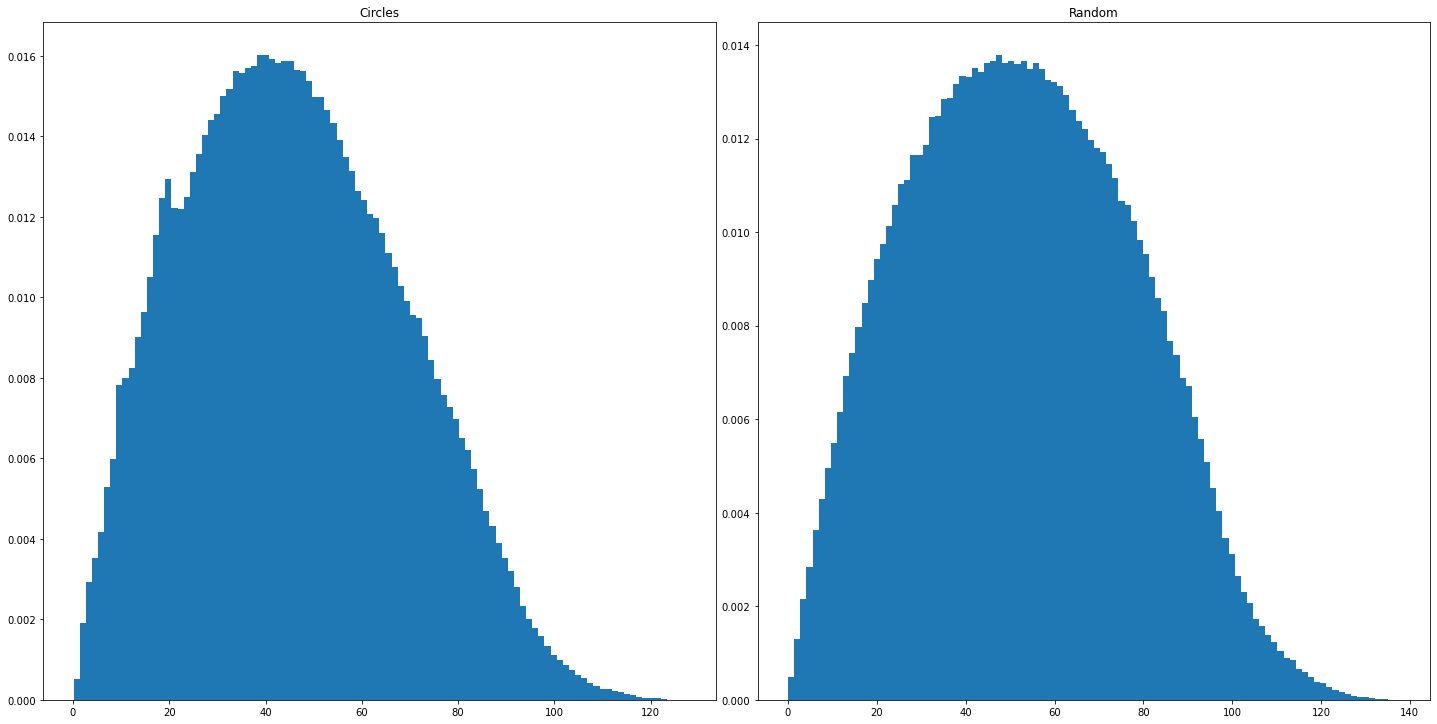

In [33]:
fig_cosmo, axes_cosmo = plt.subplots(figsize=(20,10), nrows=1, ncols=2)
plt.tight_layout()
axes_cosmo[0].set_title('Circles')
axes_cosmo[0].hist(distancias_bayes, density=True, bins=100, label="Data")

axes_cosmo[1].set_title('Random')
axes_cosmo[1].hist(distancias_random_uniform, density=True, bins=100, label="Data")

Ahora, definimos un arreglo en el que podremos los puntos con ambas distribuciones, es decir, todos.

In [34]:
X_total_uniform = x_1.copy()
X_total_uniform.extend(X2)

Y_total_uniform = y_1.copy()
Y_total_uniform.extend(Y2)

Calculamos las distancias de todos los puntos

In [35]:
distancias_total_uniform = distancias(X_total_uniform,Y_total_uniform)

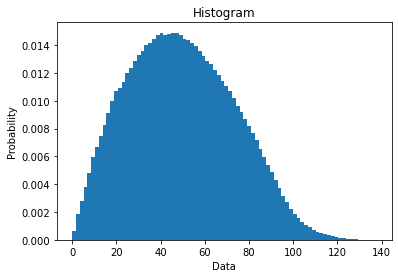

In [36]:
hist_random = plt.hist(distancias_total_uniform, density=True, bins=80, label="Data")
plt.ylabel("Probability")
plt.xlabel("Data")
plt.title("Histogram");

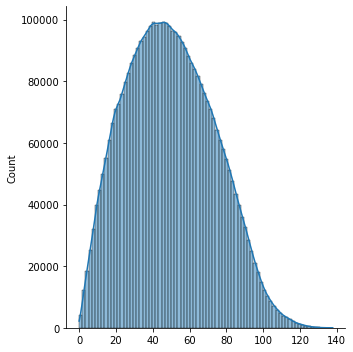

In [37]:
sns.displot(distancias_total_uniform, bins=80, kde=True);

Ahora, la forma más sencilla de estimar la función de correlación de dos puntos $\xi(r)$ :
$$\xi(r)=\frac{\hat{DD}}{\hat{RR}}-1 $$
donde DD es la distribución de distancias de pares de galaxias dentro de un conjunto de datos, y RR la distribución de distancias de un conjunto aleatorio. Si $\xi(r)=0$ la distribución de galaxias en los datos también es aleatoria; $\xi(r)>0$ existe una sobredensidad y, contrariamente, para $\xi(r)<0$ una infradensidad.
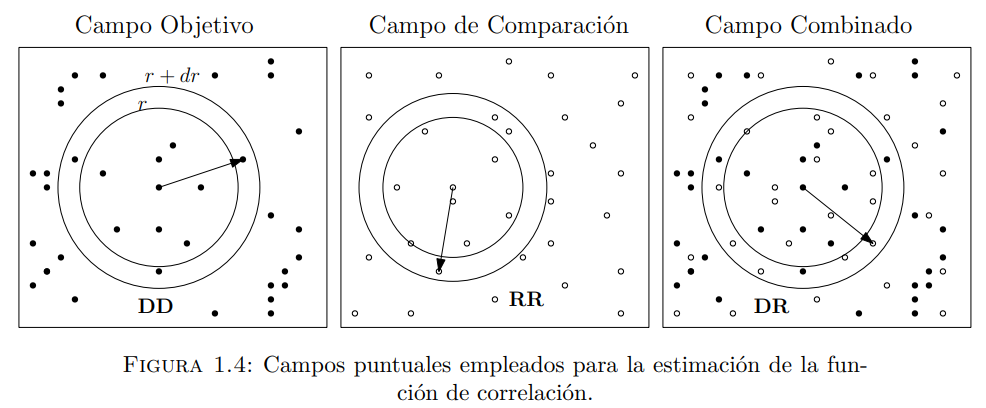
Esta consiste
en considerar una caja de paredes periódicas en un espacio
euclideano, luego con las galaxias que están dentro de esta
caja se crea la función correlación sacando la razón entre el
número de pares de galaxias que se encuentran a una distancia r+dr en una muestra de galaxias (DD(r)) y el número de
pares esperado en la ausencia de clustering (RR(r)), que se
encuentran a distancia r+dr, tomando en cuenta los límites
de la muestra y considerando una distribución homogenea,
por lo general este último dato se obtiene a partir de un catálogo random

Calculada cada distancia es conveniente, nuevamente, guardar estos datos en un arreglo.
Ya teniendo todos las distancias calculadas y guardadas en este arreglo se pasa a crear un nuevo arreglo donde cada
”celda” corresponder´a a un rango de distancia distinto. Con este arreglo creado se comienza a contar la cantidad de
pares que hay por cada rango de distancia (DD(r)), luego el número que esto arroje se guarda en la celda correspondiente. Este último paso se repite para RR(r).

In [38]:
#Calculamos la distancia máxima que puede tener, es decir, la diagonal del cuadrado
((100)**2+(100)**2)**(1/2)

141.4213562373095

In [39]:
cir_bayes=distancias_bayes.copy()

Creamos un Data frame con las distancias de la distribución de círculos

In [40]:
df = pd.DataFrame(cir_bayes)

Creamos una columna en la que iremos separando los datos, de tal forma que todas distancias entre 0 y 1 se categorizan como 1, las mayores a 1 hasta 2 se categorizan como 2 y así sucesivamente

In [41]:
for i in range(0,146,1):
    df.loc[(df[0]>i) & (df[0]<=i+2), 'data_category']=int(i+2)

C:\Users\sammy\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='data_category', ylabel='Density'>

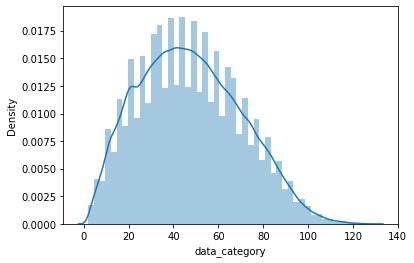

In [42]:
sns.distplot(df['data_category'])

In [43]:
cir_random=distancias_random_uniform.copy()

Hacemos un dataframe y categorizamos para la distribución normal

In [44]:
dfR = pd.DataFrame(cir_random)

In [45]:
for i in range(0,146,1):
    dfR.loc[(dfR[0]>i) & (dfR[0]<=i+2), 'data_category']=i+2

C:\Users\sammy\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='data_category', ylabel='Density'>

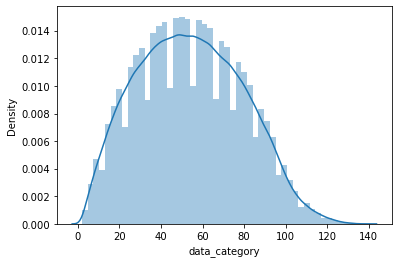

In [46]:
sns.distplot(dfR['data_category'])

In [47]:
# Convierto las columnas en listas
data = df['data_category'].tolist()
dataR = dfR['data_category'].tolist()

In [48]:
# Convierto todos los elementos de las lista a int
for i in range(0, len(data)):
    data[i] = int(data[i])
for i in range(0, len(dataR)):
    dataR[i] = int(dataR[i])

In [49]:
DD = {}
RR = {}
#Creamos diccionarios donde nos dice cuantas veces se repite cada elemento
for i in data:
    DD[i] = data.count(i)
for j in data:
    RR[j] = dataR.count(j)

Graficamos los histogramas "manuales"

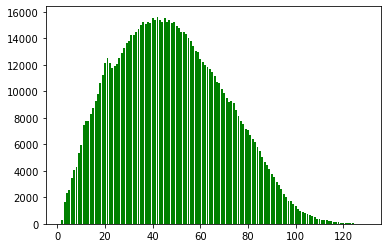

In [50]:
plt.bar(list(DD.keys()), DD.values(), color='g')
plt.show()

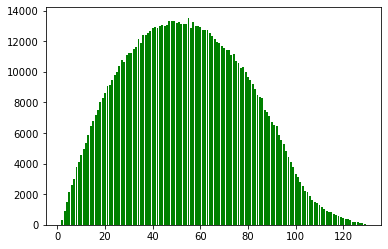

In [51]:
plt.bar(list(RR.keys()), RR.values(), color='g')
plt.show()

In [52]:
#Convertimos los diccionarios en listas de duplas (categoria, cantidad_de_distancias)
sorted_DD = sorted(DD.items())
sorted_RR= sorted(RR.items())

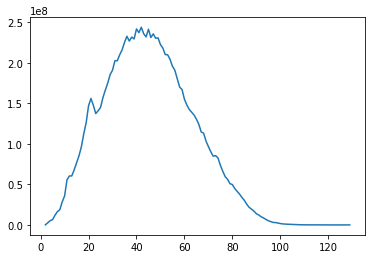

In [53]:
xDD = [x[0] for x in sorted_DD]
yDD = [x[1]**2 for x in sorted_DD]
plt.plot(xDD, yDD)

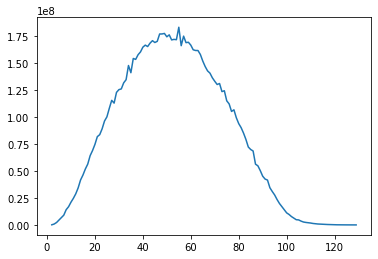

In [54]:
xRR = [x[0] for x in sorted_RR]
yRR = [x[1]**2 for x in sorted_RR]
plt.plot(xRR, yRR)

In [56]:
Y = np.zeros(len(sorted_DD))
for l in range(len(sorted_DD)):
    Y[l]= yDD[l] - yRR[l]

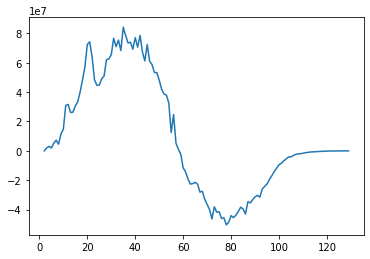

In [57]:
plt.plot(xRR, Y)

## Función de correlación

In [74]:
ξ = np.zeros((len(sorted_RR),2), dtype = float)
for i in range(len(sorted_RR)):
    ξ[i][0] = sorted_RR[i][0]
    ξ[i][1] = (sorted_DD[i][1]/sorted_RR[i][1])-1
    

In [75]:
ξ[18]

array([20.       ,  0.4033098])

In [76]:
sorted_DD[114][1]

165

In [77]:
ξ_graf = np.zeros((len(sorted_RR)), dtype = float)
for i in range(len(sorted_RR)):
    ξ_graf[i] = (sorted_DD[i][1]/sorted_RR[i][1])-1

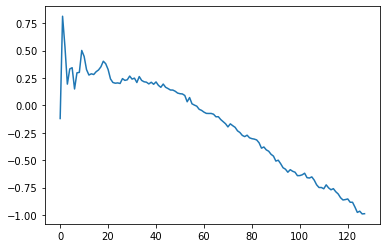

In [78]:
plt.plot(ξ_graf)

## Analicemos distintos parámetros